In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data=pd.read_csv("ToyotaCorolla.csv")

In [26]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [27]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [29]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [30]:
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)




In [31]:
# Renaming columns Age
data.rename(columns={'Age_08_04': 'Age'}, inplace=True)

In [32]:
data

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


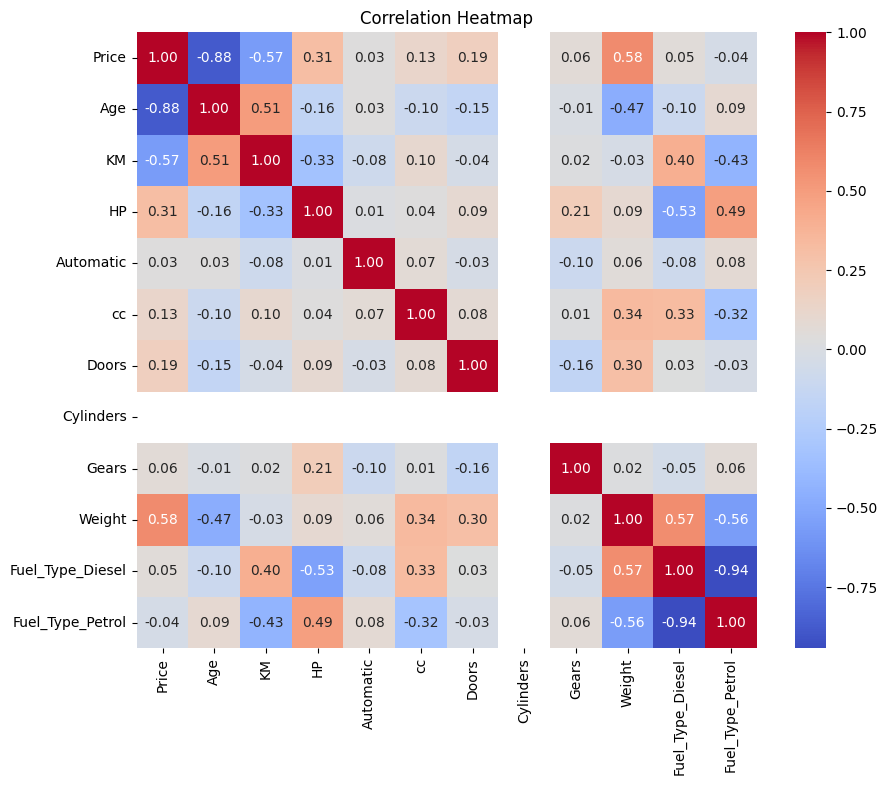

In [33]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

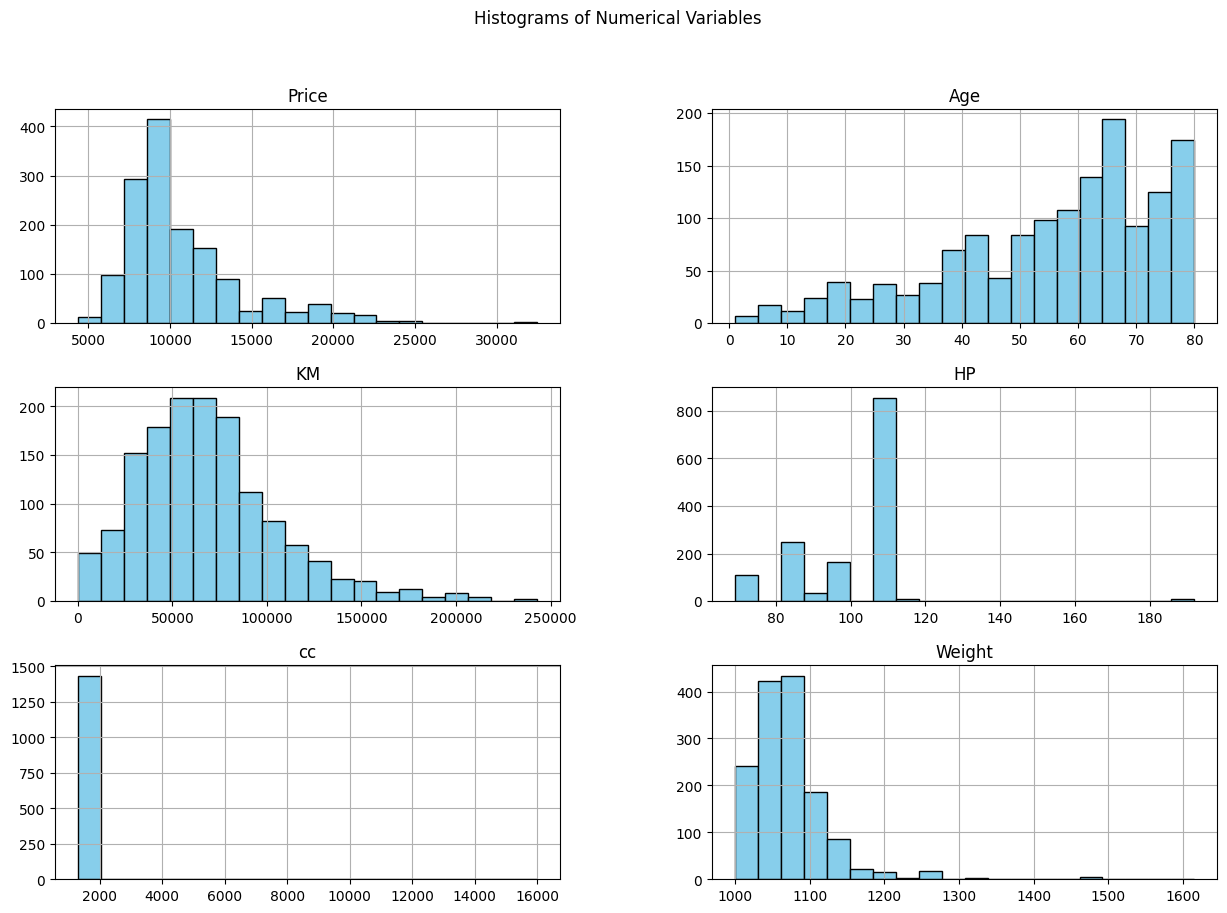

In [35]:
# Plotting histograms for numerical variables
numeric_columns = ["Price",'Age', "KM", "HP", "cc", "Weight"]
data[numeric_columns].hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Variables")
plt.show()

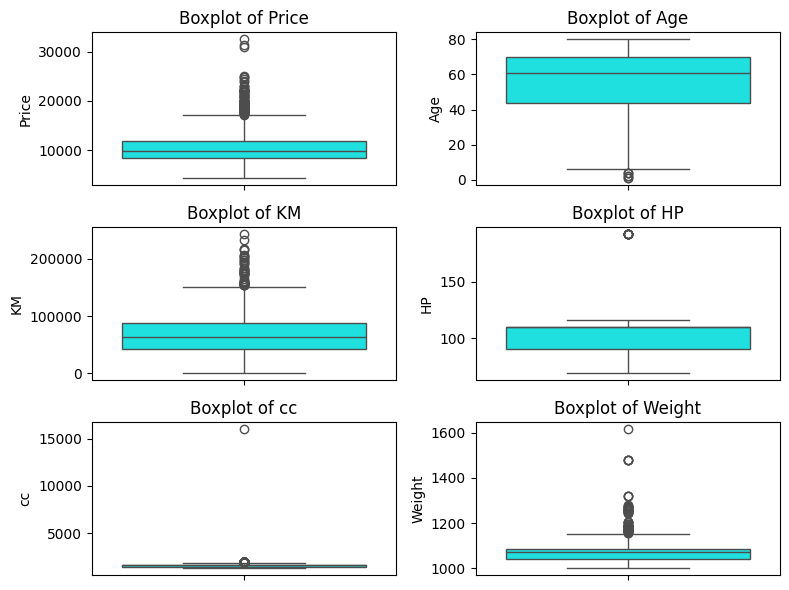

In [36]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, y=col, color="cyan")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

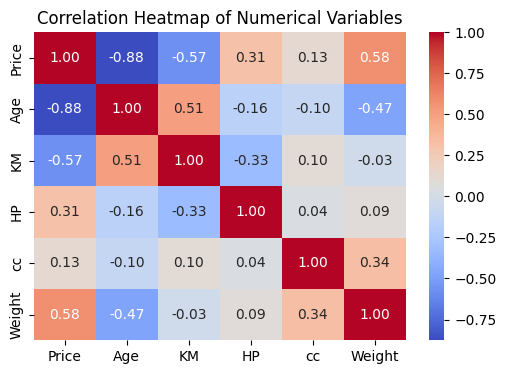

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

*Define the target (y) and features (X)*

**Split the dataset into training (80%) and testing (20%)**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
data = data.drop(columns=["Cylinders"])
X = data.drop(columns=["Price"])
y = data["Price"]

In [53]:
numerical_features = ["Age", "KM", "HP", "cc", "Weight"]
categorical_features = ["Fuel_Type_Petrol","Fuel_Type_Diesel"]

In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)



In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [57]:
X_train_preprocessed.shape, X_test_preprocessed.shape

((1148, 9), (288, 9))

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
model_1 = LinearRegression()
model_1.fit(X_train_preprocessed, y_train)

LinearRegression()

In [60]:
# Predict on training and testing datasets
y_train_pred = model_1.predict(X_train_preprocessed)
y_test_pred = model_1.predict(X_test_preprocessed)

In [62]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [63]:
mse_train, mse_test, r2_train, r2_test

(1715699.1192614264, 2215881.459272436, 0.8689655849291223, 0.8339266636660894)

Multicollinearity.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [80]:
num_feature_names = numerical_features  # Numerical features remain the same
cat_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

In [82]:
predictor_names = num_feature_names + cat_feature_names


vif_data = pd.DataFrame()
vif_data["Feature"] = predictor_names  # Now predictor_names is defined
vif_data["VIF"] = [
    variance_inflation_factor(X_train_preprocessed, i) # Removing .toarray() as X_train_preprocessed is already a dense array
    for i in range(X_train_preprocessed.shape[1])]

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [83]:
print(vif_data)

                  Feature       VIF
0                     Age  1.916935
1                      KM  2.015408
2                      HP  2.197339
3                      cc  1.177904
4                  Weight  3.187633
5  Fuel_Type_Petrol_False       inf
6   Fuel_Type_Petrol_True       inf
7  Fuel_Type_Diesel_False       inf
8   Fuel_Type_Diesel_True       inf


Adjusted R-squared, AIC, and BIC

In [88]:
import statsmodels.api as sm
X_train_with_const = sm.add_constant(X_train_preprocessed)
model = sm.OLS(y_train, sm.add_constant(X_train_preprocessed)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1079.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:10:50   Log-Likelihood:                -9869.5
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1140   BIC:                         1.980e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.984e+15   1.26e+16     -0.236      0.8

Detect Outliers

In [85]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag

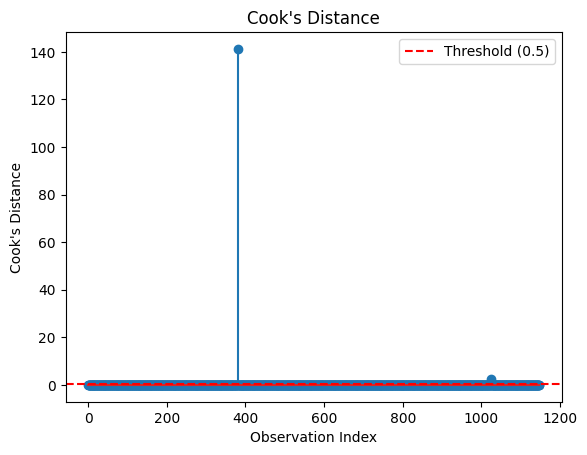

In [90]:
# Plot Cook's Distance
import matplotlib.pyplot as plt
plt.stem(cooks_d)
plt.axhline(y=0.5, color='r', linestyle='--', label="Threshold (0.5)")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

Robust Regression

In [91]:
from sklearn.linear_model import HuberRegressor

In [92]:
robust_model = HuberRegressor()
robust_model.fit(X_train_preprocessed, y_train)

HuberRegressor()

In [93]:
y_robust_pred = robust_model.predict(X_test_preprocessed)
print(f"Robust Regression R^2: {robust_model.score(X_test_preprocessed, y_test)}")

Robust Regression R^2: 0.8092328154088837


In [94]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
# Evaluate the robust regression model
mse_robust = mean_squared_error(y_test, y_robust_pred)
r2_robust = r2_score(y_test, y_robust_pred)

In [97]:
print("Huber Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_robust:.2f}")
print(f"R-squared (R^2): {r2_robust:.2f}")

Huber Regression Performance:
Mean Squared Error (MSE): 2545366.26
R-squared (R^2): 0.81


In [98]:
y_ols_pred = model.predict(sm.add_constant(X_test_preprocessed))

In [101]:
# Evaluate the OLS model
mse_ols = mean_squared_error(y_test, y_ols_pred)
r2_ols = r2_score(y_test, y_ols_pred)

In [102]:
print("OLS Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_ols:.2f}")
print(f"R-squared (R^2): {r2_ols:.2f}")

OLS Regression Performance:
Mean Squared Error (MSE): 2210606.88
R-squared (R^2): 0.83


In [109]:
# Compare OLS and Robust Regression
print("\n        Comparison of Models:")
print(f"OLS -    MSE: {mse_ols:.2f},   R^2: {r2_ols:.2f}")
print(f"Robust - MSE: {mse_robust:.2f},   R^2: {r2_robust:.2f}")


        Comparison of Models:
OLS -    MSE: 2210606.88,   R^2: 0.83
Robust - MSE: 2545366.26,   R^2: 0.81
